In [22]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
ratings = pd.read_csv(
    "./ml-latest-small/ratings.csv",
    sep=',',
    names=["userid", "itemid", "rating", "timestamp"],
    skiprows=1
)


movies = pd.read_csv(
    "./ml-latest-small/movies.csv",
    sep=',',
    names=["itemid", "title", "genres"],
    encoding='latin-1',
    skiprows=1
)

tags = pd.read_csv(
    "./ml-latest-small/tags.csv",
    header=0,
    index_col=0
)

In [4]:
ratings.head()

,userid,itemid,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies.head()

,itemid,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userid     100836 non-null  int64  
 1   itemid     100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   itemid  9742 non-null   int64 
 1   title   9742 non-null   object
 2   genres  9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
ratings["rating"].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

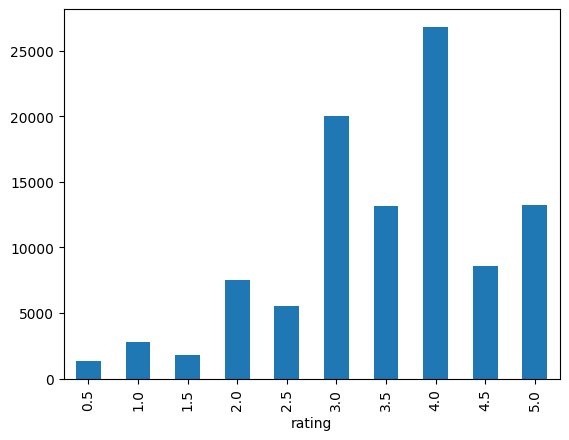

In [11]:
# histogram of ratings
ratings.groupby('rating').size().plot(kind='bar');

In [12]:
print("There are {} users and {} movies in this dataset."\
      .format(ratings.userid.nunique(),
              ratings.itemid.nunique()))

There are 610 users and 9724 movies in this dataset.


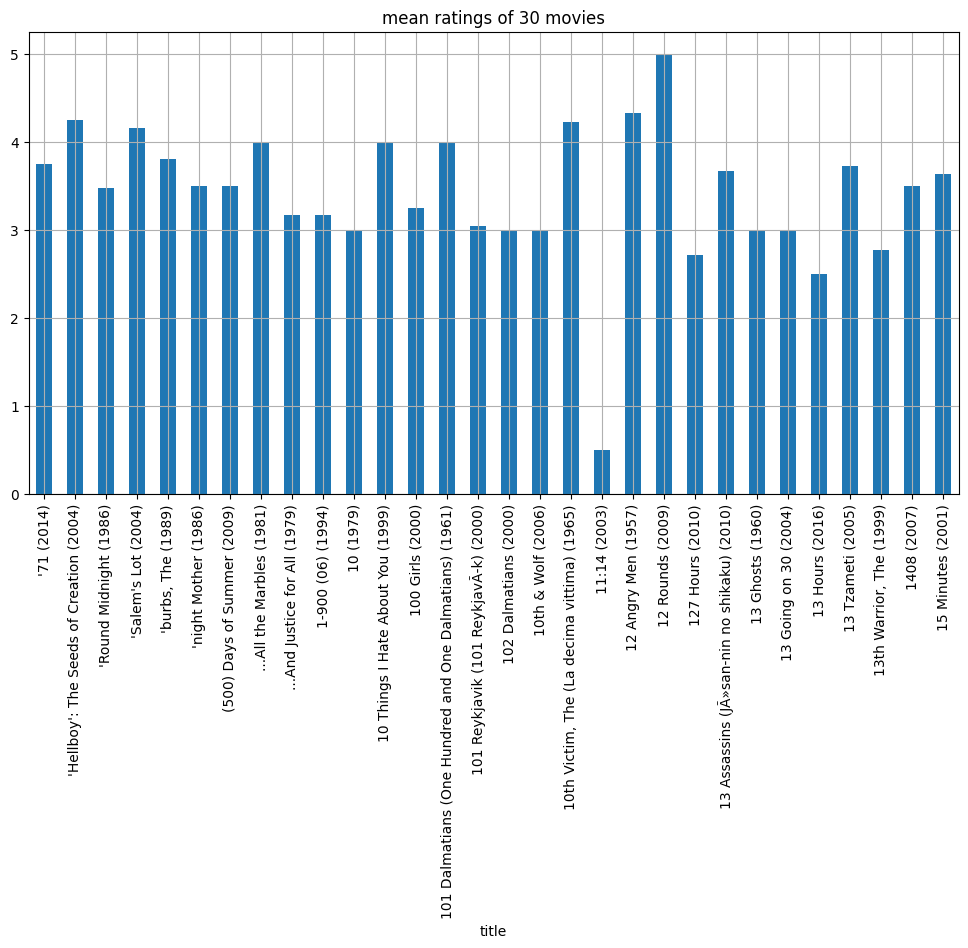

In [20]:
# average rating of movies
movie_means = ratings.join(movies['title'], on='itemid').groupby('title').rating.mean()
movie_means[:30].plot(kind='bar', grid=True, figsize=(12, 6), title="mean ratings of 30 movies");

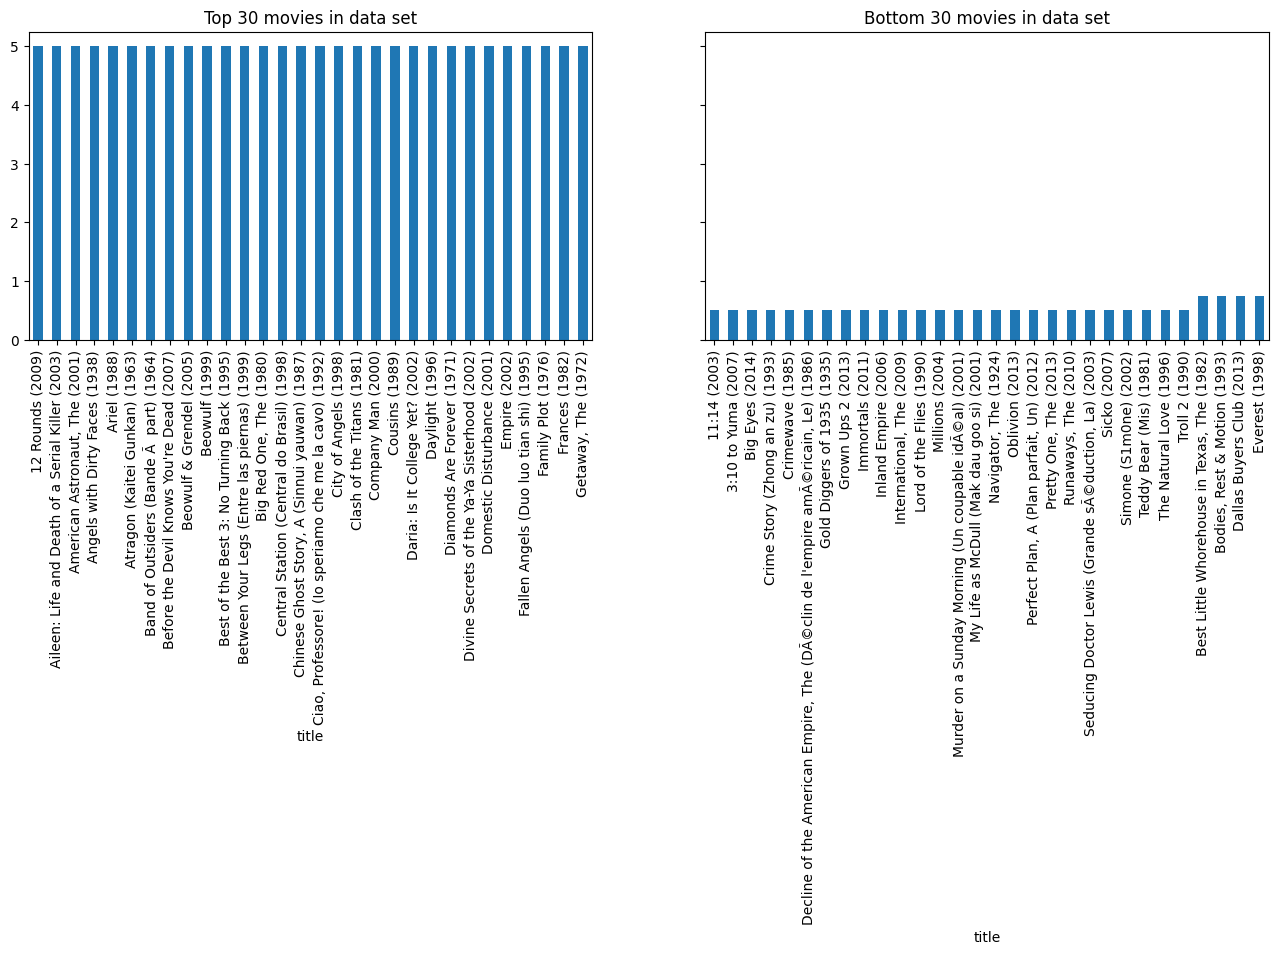

In [21]:
# 30 most rated movies vs. 30 less rated movies
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4), sharey=True)
movie_means.nlargest(30).plot(kind='bar', ax=ax1, title="Top 30 movies in data set");
movie_means.nsmallest(30).plot(kind='bar', ax=ax2, title="Bottom 30 movies in data set");

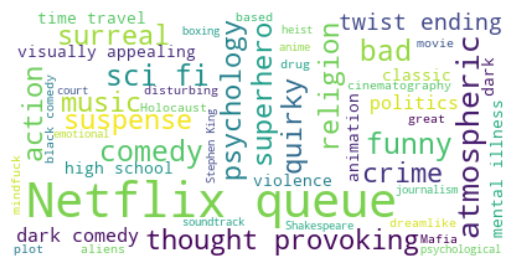

In [25]:
# Generating WordClouds for tags in Python
# Create and generate a word cloud image:
text = tags["tag"].str.cat(sep=', ')

wordcloud = WordCloud(background_color="white",max_words=50).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
df_movie_count = ratings["itemid"].value_counts()
df_movie_count.quantile(np.arange(1, 0.45, -0.05))

1.00    329.0
0.95     47.0
0.90     27.0
0.85     17.0
0.80     12.0
0.75      9.0
0.70      7.0
0.65      5.0
0.60      4.0
0.55      3.0
0.50      3.0
Name: count, dtype: float64

Около 1% фильмов имеют 329 или более оценок, 5% фильмов имеют 47 или более оценок, и 10% фильмов имеют 27 или более оценок. Таким образом, мы можем удалить те фильмы, у которых всего 50 оценок или меньше.